<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 4 - Unsupervised Learning - K-Means Clustering and Hierarchical Clustering</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement two clustering models- K-Means and Hierarchical Clustering to segment customers based on their online transactions**



**Guidelines**
* Download `OnlineRetailData.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 4 - Unsupervised Learning - K-Means Clustering and Hierarchical Clustering (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

#### Read the content of the `OnlineRetailData.csv` file into a dataset and perform the following:

> **Q1.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 

> **Q1.2.** Visualize the dataset

> **Q1.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.4.** Build a clustering model using K-Means clustering algorithm to segment the customers based on recency, frequency, and amount.  

> **Q1.5.** Build a clustering model using hierarchical clustering algorithm to segment the customers based on recency, frequency, and amount.

> **Q1.6.** Based on the clustering on Q1.4 and Q1.5, describe the customers in each cluster

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('OnlineRetailData.csv')
dataset.shape

(4293, 4)

In [3]:
dataset.head(10)

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
6,12353.0,89.00,4,203
7,12354.0,1079.40,58,231
8,12355.0,459.40,13,213
9,12356.0,2811.43,59,22


**Q1.1.1. Dealing with the missing data**

In [4]:
dataset.isna().sum()

CustomerID    0
Amount        0
Frequency     0
Recency       0
dtype: int64

**Answer:** There is no any missing data.

**Q1.1.2. Dealing with the irregular data (outliers)**

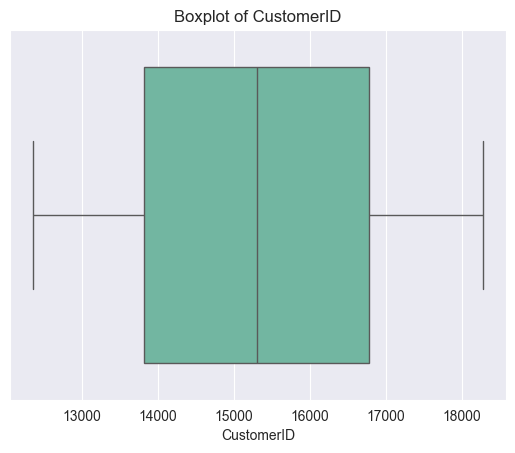

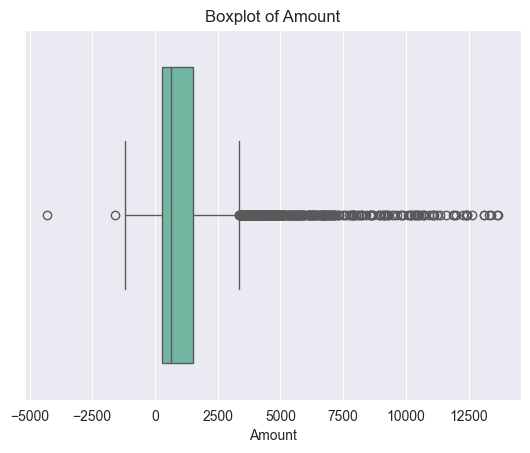

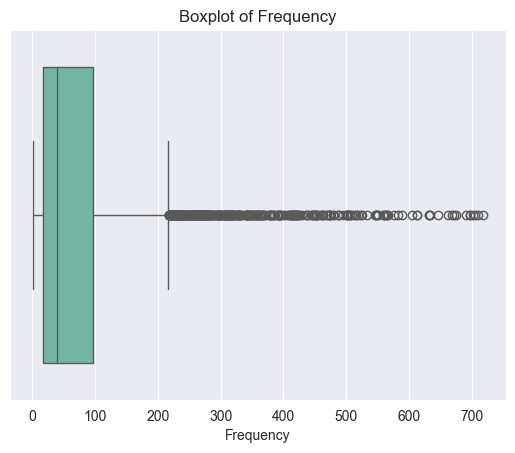

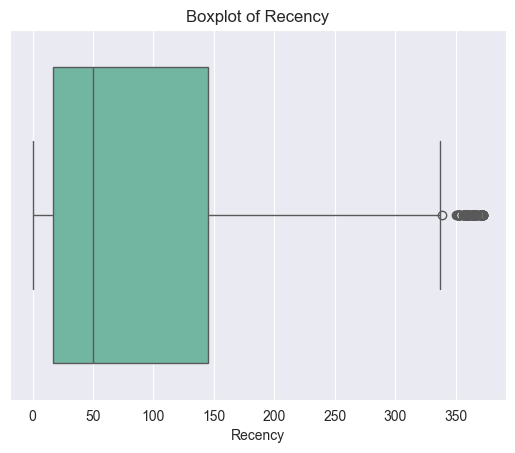

In [5]:
for column in dataset.columns:
    sns.boxplot(x=dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4293 non-null   float64
 1   Amount      4293 non-null   float64
 2   Frequency   4293 non-null   int64  
 3   Recency     4293 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 134.3 KB


In [7]:
# Remove outliers using Isolation Forest
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.05)
outlier_mask = iso_forest.fit_predict(dataset[dataset.columns])
dataset = dataset[outlier_mask != -1]

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078 entries, 0 to 4292
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4078 non-null   float64
 1   Amount      4078 non-null   float64
 2   Frequency   4078 non-null   int64  
 3   Recency     4078 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 159.3 KB


**Q1.1.3. Dealing with the unnecessary data**

In [9]:
len(np.unique(dataset['CustomerID']))

4078

In [10]:
dataset = dataset.drop(['CustomerID'], axis=1)
dataset.head(10)

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
5,1545.41,95,35
6,89.00,4,203
7,1079.40,58,231
8,459.40,13,213
9,2811.43,59,22


**Q1.1.4. Dealing with the inconsistent data**

**Answer:** No any inconsistent data were found.

**Q1.1.5. Encoding categorical data**

**Answer:** All three columns are numeric. Therefore, encoding in not required.

**Q1.2. Visualize the dataset**

<Axes: title={'center': 'Recency Vs. Frequency'}, xlabel='Recency', ylabel='Frequency'>

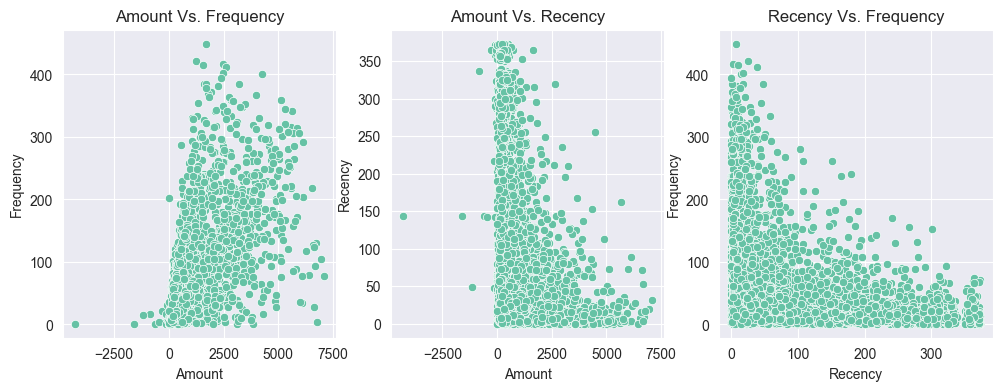

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Amount Vs. Frequency")
sns.scatterplot(x="Amount", y="Frequency", data=dataset)

plt.subplot(1, 3, 2)
plt.title("Amount Vs. Recency")
sns.scatterplot(x="Amount", y="Recency", data=dataset)

plt.subplot(1, 3, 3)
plt.title("Recency Vs. Frequency")
sns.scatterplot(x="Recency", y="Frequency", data=dataset)

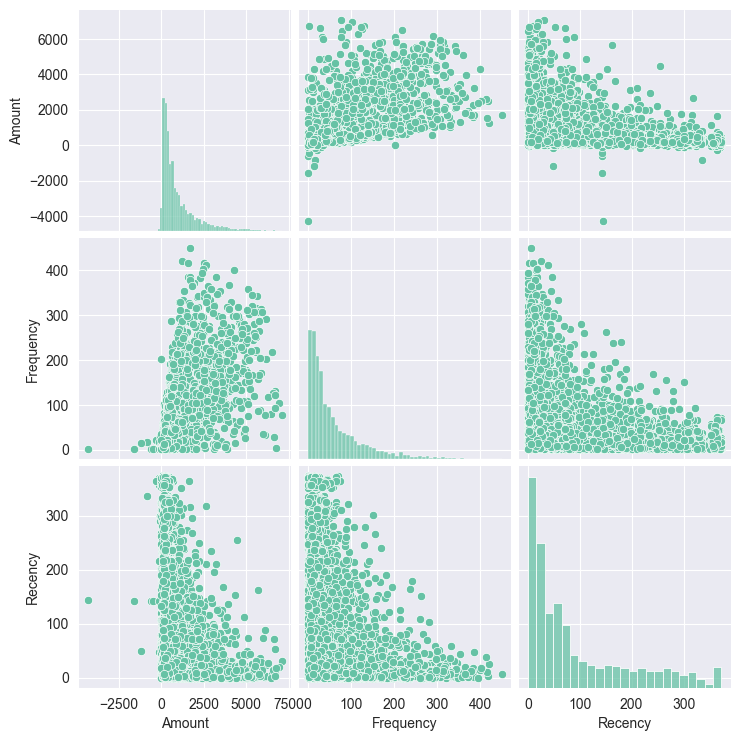

In [12]:
sns.pairplot(dataset)

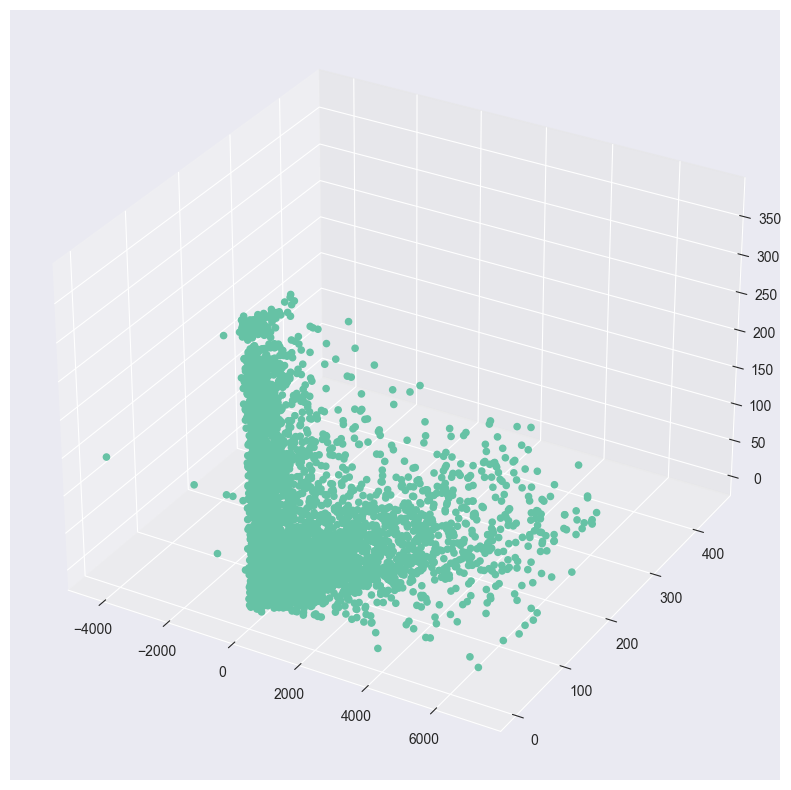

In [13]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], dataset.iloc[:, 2], alpha=1)
plt.show()

**Q1.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability**

In [14]:
dataset.describe()

,Amount,Frequency,Recency
count,4078.000000,4078.000000,4078.000000
mean,1015.978586,63.970819,93.932810
std,1131.468151,70.201108,99.934938
min,-4287.630000,1.000000,0.000000
25%,276.810000,16.000000,18.000000
50%,600.455000,38.000000,52.000000
75%,1333.152500,87.000000,148.000000
max,7072.800000,449.000000,373.000000


**Answer:** The data set extracted from the "OnlineRetailData.csv" file consists of four columns: "CustomerID", "Amount", "Frequency" and "Recency". It has altogether 4293 number of rows with no missing value. Additionally, all the data are in numeric form, reducing our effort for data encoding.

The column "CustomerID" does not seem to provide any meaningful insight for clustering our data set as it is just an auto-increment number denoting the id of the individual customer. Therefore, we deleted the column "CustomerID" for our data set with three remaining columns.

From the box plot diagram, we identified some of the outliers which we have removed using "Isolation Forest." The total number of rows that were removed as outliers was 4293 - 4078 = 215.

From the pair plot diagram, it is clear that the data for all the columns: "Amount", "Frequency" and "Recency" is positively skewed (or right skewed) as the data are mostly clustered around the left tail of the graph while the right tail of the graph is longer. The mean and median values of these data also validate this. For all three columns, the mean value is greater than their median value.

**Standardizing the Dataset**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled.shape

(4078, 3)

In [16]:
dataset_scaled

array([[-0.89803958, -0.88286952,  2.3124598 ],
       [ 2.91163774,  1.681507  , -0.93004718],
       [ 0.69056935, -0.46971997, -0.19948233],
       ...,
       [-0.8266015 , -0.81163684,  0.86133785],
       [-0.74194004, -0.72615762, -0.87000075],
       [ 0.72596134,  0.08589494, -0.51972994]])

**Q1.4. Build a clustering model using K-Means clustering algorithm to segment the customers based on recency, frequency, and amount.**

In [17]:
from sklearn.cluster import KMeans
variations = []
range_n_clusters = range(1,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    variations.append(kmeans.inertia_)

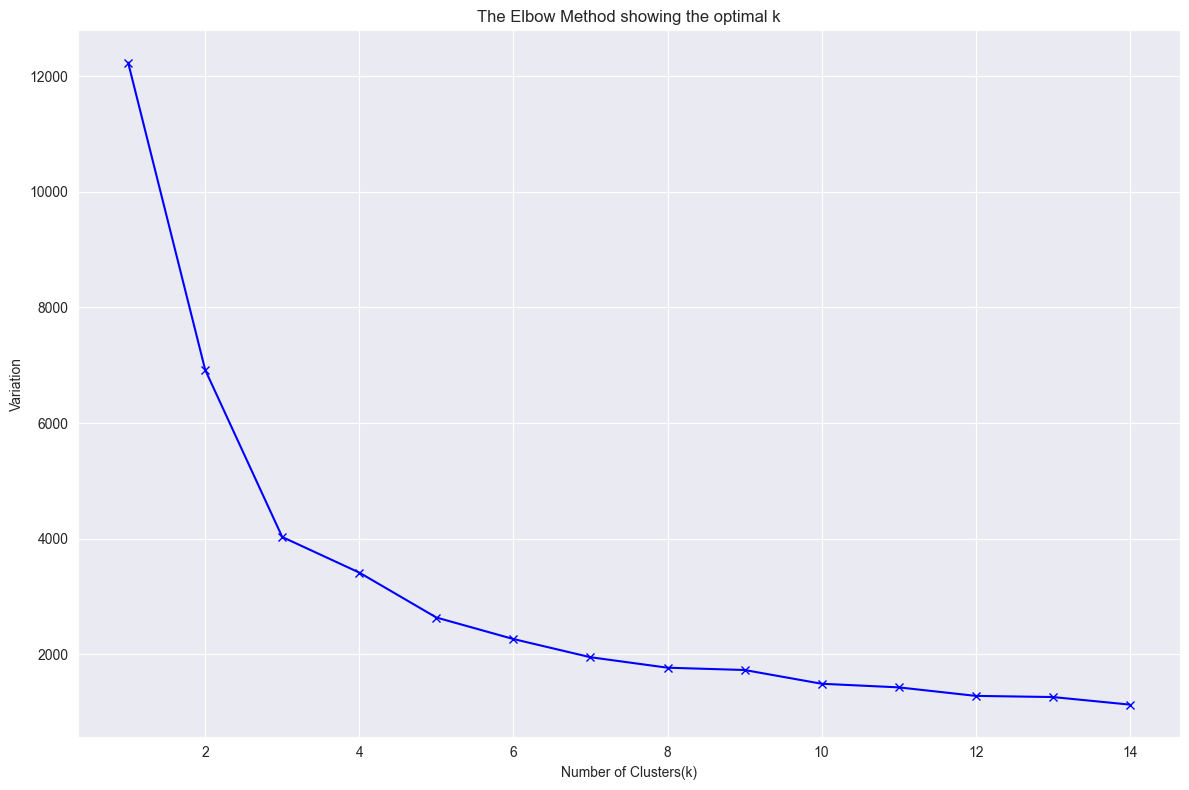

In [18]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,15)

optimal_num_clusters = 0
max_silhouette_score = 0

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters=num_clusters
    
print("\nOptimal number of clusters = {}".format(optimal_num_clusters))

For n_clusters=2, the silhouette score is 0.367177088355535
For n_clusters=3, the silhouette score is 0.4766537714078064
For n_clusters=4, the silhouette score is 0.4456774619991544
For n_clusters=5, the silhouette score is 0.42434519736636744
For n_clusters=6, the silhouette score is 0.38530057171029714
For n_clusters=7, the silhouette score is 0.3750029142192437
For n_clusters=8, the silhouette score is 0.3771022820394896
For n_clusters=9, the silhouette score is 0.3752002355674227
For n_clusters=10, the silhouette score is 0.36586120173775477
For n_clusters=11, the silhouette score is 0.34584795884450925
For n_clusters=12, the silhouette score is 0.331720806737892
For n_clusters=13, the silhouette score is 0.33026345318666317
For n_clusters=14, the silhouette score is 0.311153607552473

Optimal number of clusters = 3


In [20]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(dataset_scaled)

KMeans(max_iter=50, n_clusters=3)

In [21]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [22]:
dataset['km_clusters'] = kmeans.labels_

In [23]:
dataset.head(10)

,Amount,Frequency,Recency,km_clusters
0,0.00,2,325,2
1,4310.00,182,1,1
2,1797.24,31,74,0
3,1757.55,73,18,0
4,334.40,17,309,2
5,1545.41,95,35,0
6,89.00,4,203,2
7,1079.40,58,231,2
8,459.40,13,213,2
9,2811.43,59,22,1


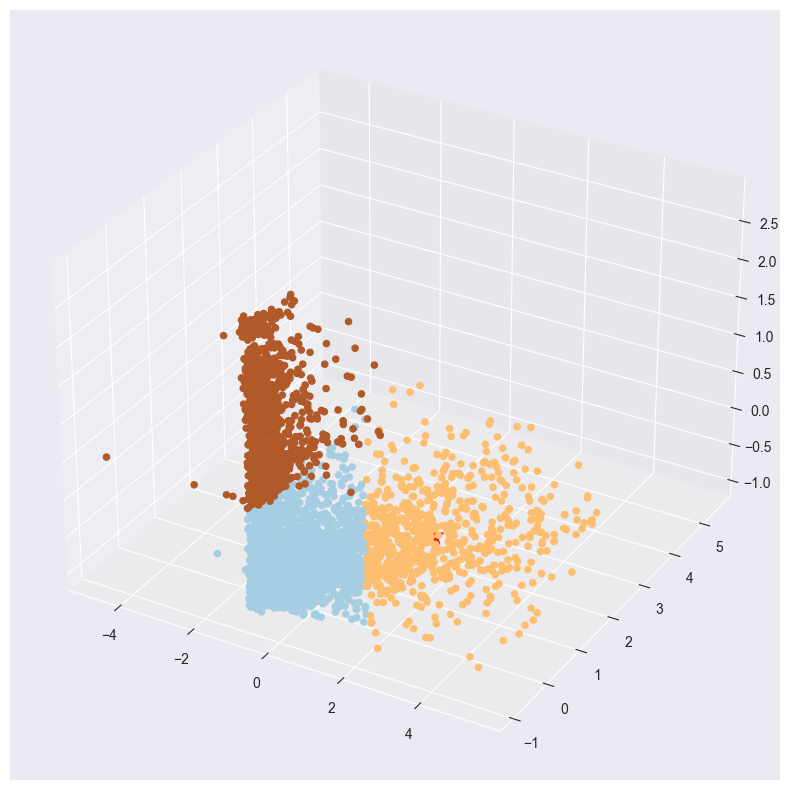

In [24]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], dataset_scaled[:, 2], c=kmeans.labels_, alpha=1, cmap='Paired')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, alpha=1)
plt.show()

Text(0.5, 0.98, 'Cluster Analysis')

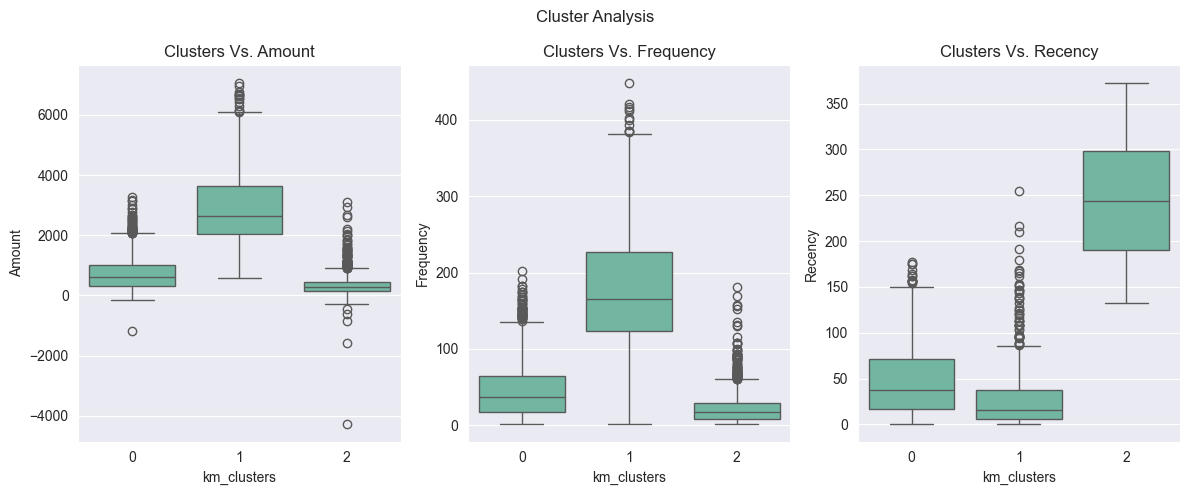

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='km_clusters', y='Amount', data=dataset)
plt.title('Clusters Vs. Amount')

plt.subplot(1, 3, 2)
sns.boxplot(x='km_clusters', y='Frequency', data=dataset)
plt.title('Clusters Vs. Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(x='km_clusters', y='Recency', data=dataset)
plt.title('Clusters Vs. Recency')

plt.suptitle('Cluster Analysis')

**Q1.5. Build a clustering model using hierarchical clustering algorithm to segment the customers based on recency, frequency, and amount.**

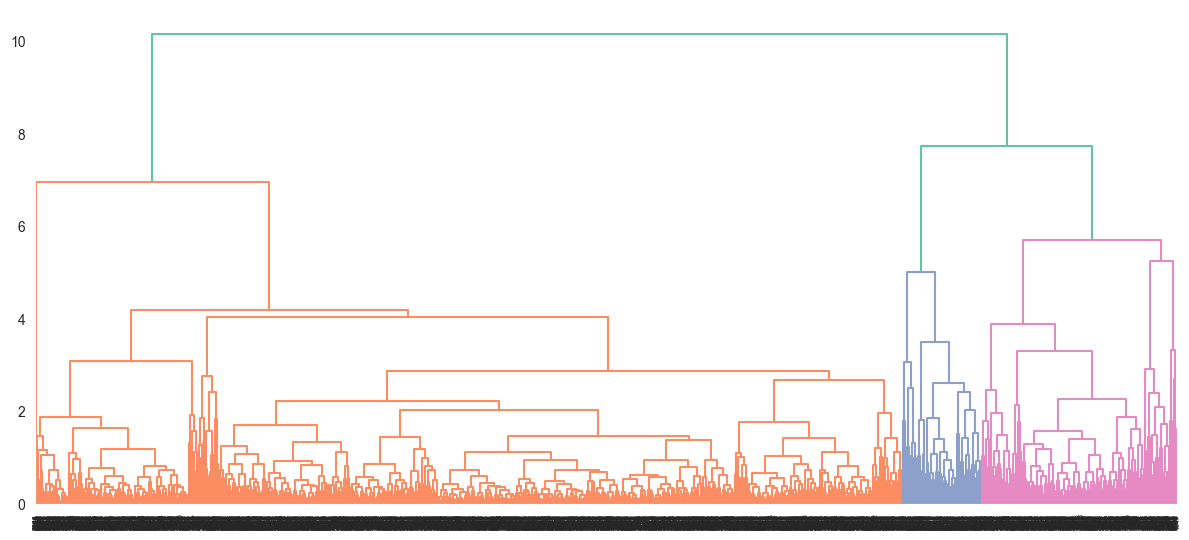

In [26]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
mergings = linkage(dataset_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [27]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
dataset['h_clusters'] = cluster_labels
dataset.head(10)

,Amount,Frequency,Recency,km_clusters,h_clusters
0,0.00,2,325,2,0
1,4310.00,182,1,1,1
2,1797.24,31,74,0,0
3,1757.55,73,18,0,1
4,334.40,17,309,2,0
5,1545.41,95,35,0,1
6,89.00,4,203,2,0
7,1079.40,58,231,2,0
8,459.40,13,213,2,0
9,2811.43,59,22,1,1


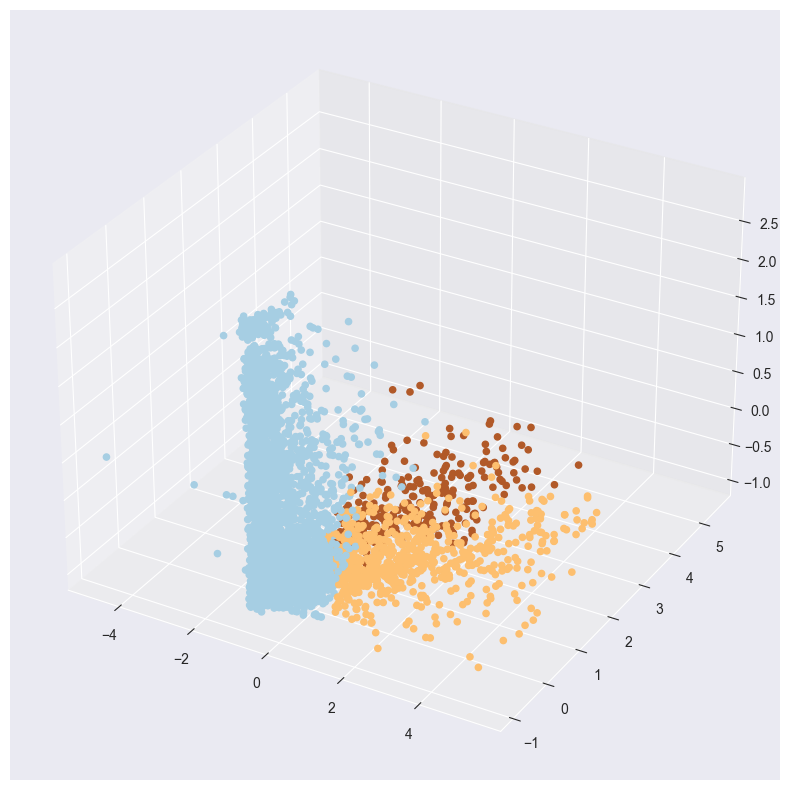

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], dataset_scaled[:, 2], c=dataset['h_clusters'], alpha=1, cmap='Paired')
plt.show()

Text(0.5, 0.98, 'Cluster Analysis')

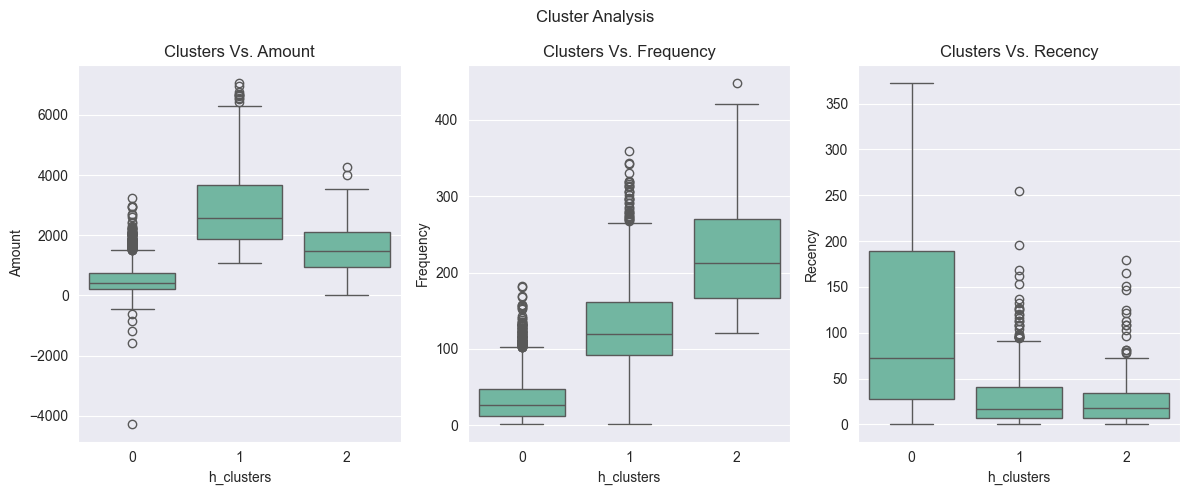

In [30]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='h_clusters', y='Amount', data=dataset)
plt.title('Clusters Vs. Amount')

plt.subplot(1, 3, 2)
sns.boxplot(x='h_clusters', y='Frequency', data=dataset)
plt.title('Clusters Vs. Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(x='h_clusters', y='Recency', data=dataset)
plt.title('Clusters Vs. Recency')

plt.suptitle('Cluster Analysis')

Text(0.5, 0.92, 'Hierarchical Clusters')

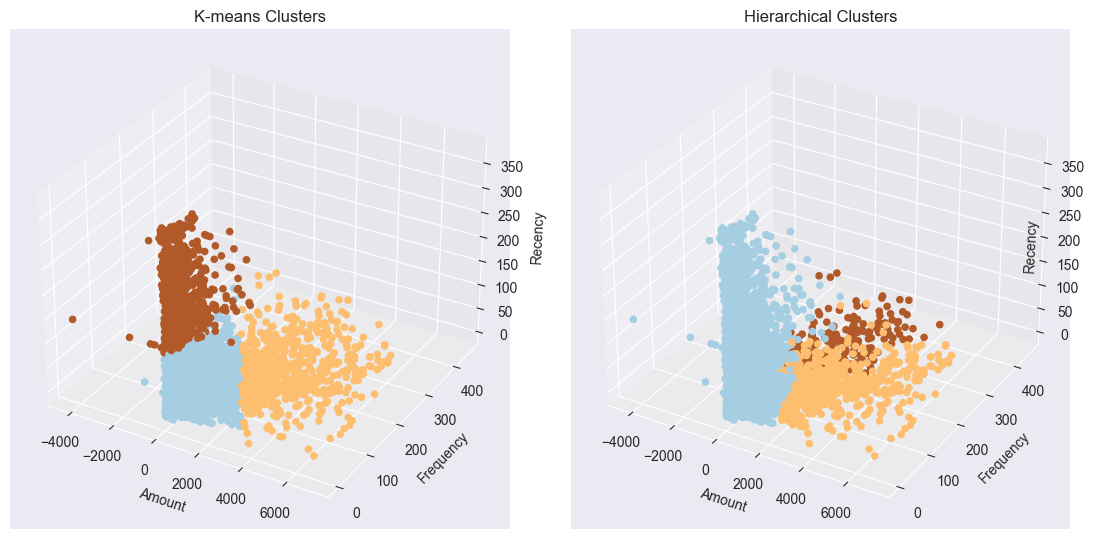

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'})
ax1.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], dataset.iloc[:, 2], c=dataset['km_clusters'], alpha=1, cmap='Paired')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('Recency')
ax1.set_title('K-means Clusters')

ax2.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], dataset.iloc[:, 2], c=dataset['h_clusters'], alpha=1, cmap='Paired')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.set_zlabel('Recency', labelpad=-26)
ax2.set_title('Hierarchical Clusters')

**Q1.6. Based on the clustering on Q1.4 and Q1.5, describe the customers in each cluster**

In [32]:
dataset['km_clusters'].value_counts()

km_clusters
0    2343
2    1016
1     719
Name: count, dtype: int64

In [33]:
dataset['h_clusters'].value_counts()

h_clusters
0    3099
1     697
2     282
Name: count, dtype: int64

**Answer:** The number of customers segregated by the K-Means clustering algorithm are 2343, 719, and 1016 whereas the numbers by the Hierarchical clustering algorithm are 3099, 697, and 282.

*K-means Cluster:*

The brown color cluster in K-means is elongated vertically along the z-axis i.e. Recency axis, which means that these customers have made recent transactions. The amount spent by these customers varies, but they tend to be moderate spenders with relatively high spending frequency.

The blue color cluster in K-means is more spread out along the Amount axis with less frequency and recency compared to the customers in brown color clusters.

The orange color cluster in K-means is spread out along the Frequency axis with less recency.

*Hierarchical Cluster:*

The blue color cluster in the Hierarchical cluster extends vertically parallel with the z-axis i.e. with Recency. These customers have spent very little amount compared to the other two clusters.

The orange color cluster in the Hierarchical cluster is similar to that in the K-means cluster. They are spread out along the Frequency axis with less recency.

The brown color cluster in the Hierarchical cluster has very low recency which suggests that these customers have made very less recent transactions whereas they can be considered to be frequent customers as they have the highest frequency out of all.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

**Answer:**

1. This activity allowed me to learn different kinds of clustering algorithms that fall under unsupervised learning algorithms of Machine Learning. Before this week, I had only theoretical knowledge of the K-means clustering algorithm. But, now I knew how the algorithm works by applying it in the 3-D data set which also enabled me to visualize the clusters as we had plotted the 3-D graph. In addition to the K-means algorithm, I also learned some of the Hierarchical Clustering algorithms such as Agglomerative, and applied them practically using techniques such as plotting dendrogram and finding the optimal number of clusters using Elbow plot and Silhouette analysis.

2. In the modern digital world businesses grow by improving advertisement inorder to grow product sales. For the optimal utilization of finance, it is best to advertise only to a certain group of people who have a high chance of buying the product. Therefore, clustering is an important step for recommending the product that they tend to buy shortly. As business is the primary factor for making a huge amount of profit in a very short period, I find this week's content valuable for my future.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab4.ipynb** to the **Lab 4 - Unsupervised Learning - K-Means Clustering and Hierarchical Clustering (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                          | Good                                               | Average                                                    | Below Average                                               | Poor                                                         | No Attempt                                                  |
| ----------------------------------------- | --------------------------------------------------- | --------------------------------------------------- | ---------------------------------------------------------- | ----------------------------------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.2         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.3         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.4         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.5         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.6         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection                     |
